In [56]:
#Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
#Load the dataset under alias suicide
suicide = pd.read_csv('master.csv')

#Get the dataset shape
suicide.shape

(27820, 12)

In [58]:
#Print the first five rows of the dataset to get an overview and show the column datatypes
display(suicide.head())
display(suicide.dtypes)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [93]:
#Show the total number of missing values per column
suicide.isna().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
gdp_for_year ($)      0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [60]:
#Drop the 'HDI for year' column as it has too many missing values
suicide.drop('HDI for year', inplace=True, axis=1)

#Rename the ' gdp_for_year ($) ' to remove the space beginning the column name
suicide.rename(columns={' gdp_for_year ($) ':'gdp_for_year ($)'}, inplace=True)

#convert 'age' column to categorical dtype
suicide.age.astype('category').cat.reorder_categories(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'], ordered=True)

#convert 'gdp_for_year ($)' column to int64
suicide['gdp_for_year ($)'] = suicide['gdp_for_year ($)'].str.replace(',', '')
suicide['gdp_for_year ($)'] = suicide['gdp_for_year ($)'].astype('int64')

In [61]:
#Print the first five rows of the dataset to get an overview and show the column datatypes to confirm the changes
display(suicide.head())
display(suicide.dtypes)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900,796,Boomers


country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
gdp_for_year ($)        int64
gdp_per_capita ($)      int64
generation             object
dtype: object

In [70]:
#calculate the total suicide no per sex and calculate what proportion of the total sum each sex contains
total_per_sex = pd.DataFrame(suicide.groupby('sex')['suicides_no'].sum())
total_per_sex['proportions'] = total_per_sex['suicides_no'].div(total_per_sex['suicides_no'].sum(), axis=0).multiply(100).round(2)
total_per_sex

,suicides_no,proportions
sex,,
female,1559510,23.11
male,5188910,76.89


In [73]:
#calculate the total suicide no per age group and calculate what proportion of the total sum each age group
total_age = pd.DataFrame(suicide.groupby('age')['suicides_no'].sum())
total_age['proportions'] = total_age['suicides_no'].div(total_age['suicides_no'].sum(), axis=0).multiply(100).round(2)
total_age

,suicides_no,proportions
age,,
15-24 years,808542,11.98
25-34 years,1123912,16.65
35-54 years,2452141,36.34
5-14 years,52264,0.77
55-74 years,1658443,24.58
75+ years,653118,9.68


In [63]:
#Get the maximum annual suicide count for each sex per country
max_per_sex = suicide.groupby('sex')['suicides_no'].max()

#Filter the dataset to know which country had the highest count per sex, as well as its year, age and generation
suicide[((suicide.suicides_no == max_per_sex.get(key='female')) & (suicide.sex == 'female')) | ((suicide.suicides_no == max_per_sex.get(key='male')) & (suicide.sex == 'male'))]\
       [['country', 'year', 'sex', 'suicides_no', 'generation', 'age']]

,country,year,sex,suicides_no,generation,age
20996,Russian Federation,1994,male,22338,Boomers,35-54 years
27213,United States,2015,female,4053,Generation X,35-54 years


In [64]:
#Alternative way to filter the dataset to know which country had the highest count per sex, as well as its year, age and generation
max_sex = suicide.merge(max_per_sex, on=['sex', 'suicides_no'], how='right')[['country', 'year', 'sex', 'suicides_no', 'generation', 'age']]
max_sex

,country,year,sex,suicides_no,generation,age
0,United States,2015,female,4053,Generation X,35-54 years
1,Russian Federation,1994,male,22338,Boomers,35-54 years


In [72]:
#Get the maximum annual suicide for each age group count per country
max_per_age = pd.DataFrame(suicide.groupby('age')['suicides_no'].max())

#Filter the dataset to know which country had the highest count per age group, as well as its year, sex and generation
max_age = suicide.merge(max_per_age, on=['age', 'suicides_no'], how='right')[['country', 'year', 'sex', 'suicides_no', 'generation', 'age']]
max_age

,country,year,sex,suicides_no,generation,age
0,Russian Federation,2001,male,6945,Millenials,15-24 years
1,Russian Federation,1994,male,10310,Boomers,25-34 years
2,Russian Federation,1994,male,22338,Boomers,35-54 years
3,Russian Federation,2000,male,404,Millenials,5-14 years
4,Russian Federation,1994,male,11431,Silent,55-74 years
5,United States,2015,male,3171,Silent,75+ years


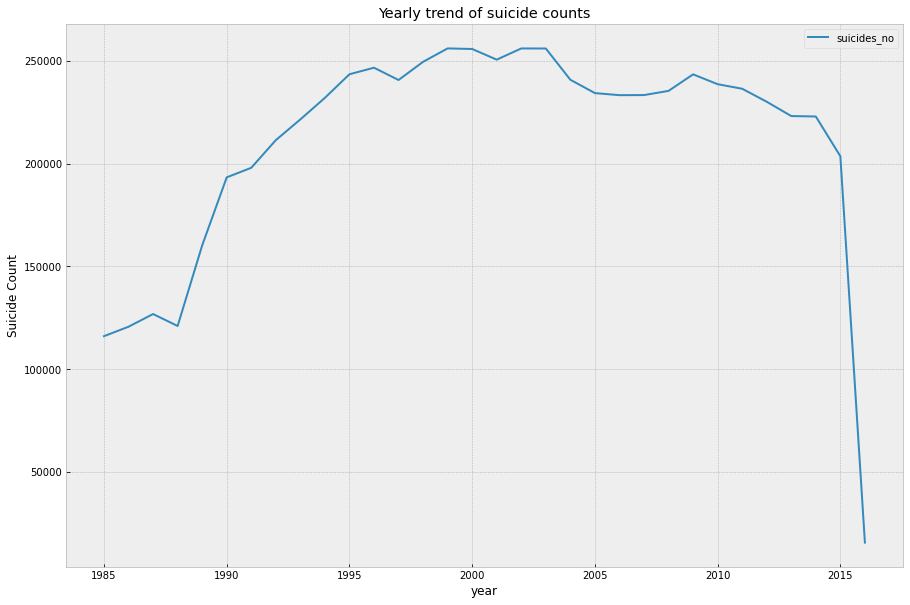

In [99]:
#Create a Figure, set its style and size 
fig,ax = plt.subplots()
plt.style.use('bmh')
fig.set_size_inches([15,10])

#Calculate the total number of suicides yearly
total_year = pd.DataFrame(suicide.groupby('year')['suicides_no'].sum())
total_year.plot(kind='line', ax=ax)

#Set y label and plot title
plt.ylabel('Suicide Count')
plt.title('Yearly trend of suicide counts')
plt.show()

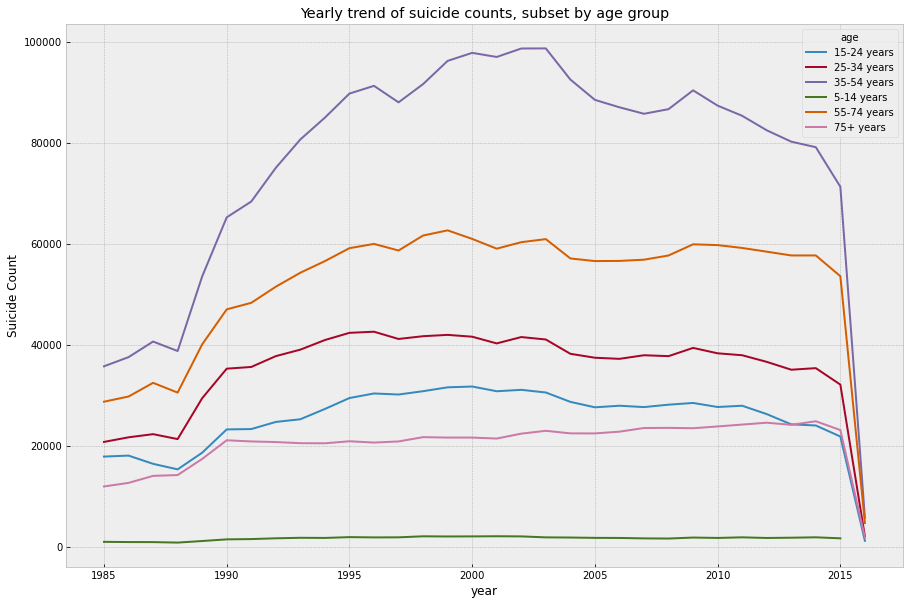

In [98]:
#Create a Figure, set its style and size
fig,ax = plt.subplots()
plt.style.use('bmh')
fig.set_size_inches([15,10])

#Calculate the total number of suicides yearly subset by age group
year_age_table = pd.pivot_table(suicide, index='year', columns='age', values='suicides_no', aggfunc=sum)
year_age_table.plot(kind='line', ax=ax)

#Set y label and plot title
plt.ylabel('Suicide Count')
plt.title('Yearly trend of suicide counts, subset by age group')
plt.show()

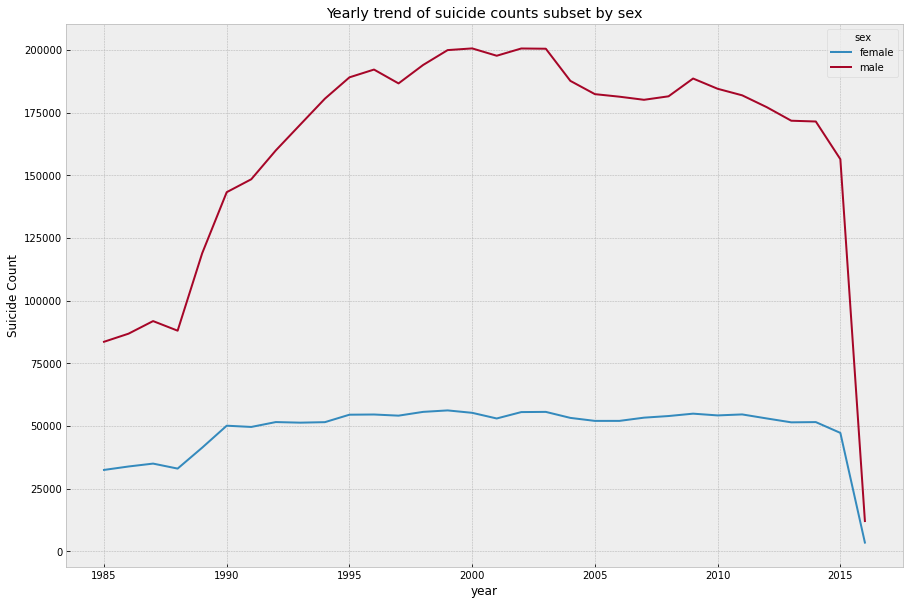

In [97]:
#Create a Figure, set its style and size
fig,ax = plt.subplots()
plt.style.use('bmh')
fig.set_size_inches([15,10])

#Calculate the total number of suicides yearly subset by sex
year_sex_table = pd.pivot_table(suicide, index='year', columns='sex', values='suicides_no', aggfunc=sum)
year_sex_table.plot(kind='line', ax=ax)

#Set y label and plot title
plt.ylabel('Suicide Count')
plt.title('Yearly trend of suicide counts subset by sex') 
plt.show()